In [11]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive

from dataset import population_data

# 9.1 Linear dynamical systems

Let’s simulate a time-invariant linear dynamical system
$$ x_{t+1} = Ax_t, \quad t = 1, . . . , T, $$
with dynamics matrix
$$
A =\begin{bmatrix}
0.97 & 0.10 & −0.05 \\
−0.30 & 0.99 & 0.05 \\
0.01 & −0.04 & 0.96
\end{bmatrix}
$$
and initial state $x_1$ = (1, 0, −1). We store trajectory in the n × T matrix **state_traj**,
with the ith column $x_t$.

Text(0.5, 0, 't')

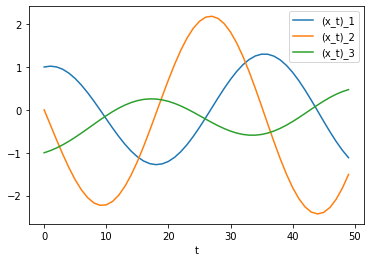

In [3]:
# initial state
x_1 = np.array([1, 0, -1])
n = len(x_1)
T = 50
A = np.array([[0.97, 0.1, -0.05],
              [-0.3, 0.99, 0.05],
              [0.01, -0.04, 0.96]])
state_traj = np.column_stack([x_1, np.zeros((n, T-1))])

# dynamics recursion
for t in range(T-1):
    state_traj[:, t+1] = A @ state_traj[:,t]

plt.ion()
plt.plot(np.arange(T), state_traj.T)
plt.legend(['(x_t)_1','(x_t)_2','(x_t)_3'])
plt.xlabel('t')

# 9.2 Population dynamics

In [55]:
# Import 3 100-vector: population, birth_rate, death_rate
D = population_data()
b = D['birth_rate']
d = D['death_rate']
x = D['population']

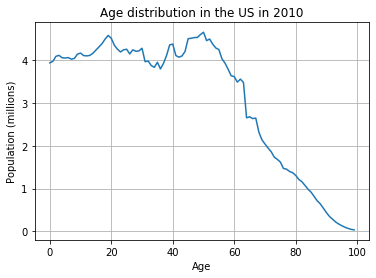

In [56]:
plt.plot(x)
plt.xlabel('Age')
plt.ylabel('Population (millions)')
plt.title('Age distribution in the US in 2010')
plt.grid(True)
plt.show()

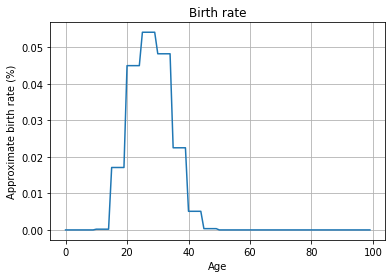

In [57]:
plt.plot(b)
plt.xlabel('Age')
plt.ylabel('Approximate birth rate (%)')
plt.title('Birth rate')
plt.grid(True)
plt.show()

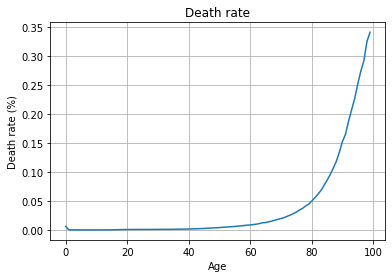

In [58]:
plt.plot(d)
plt.xlabel('Age')
plt.ylabel('Death rate (%)')
plt.title('Death rate')
plt.grid(True)
plt.show()

In [59]:
A = np.vstack([b, np.column_stack([np.diag(1 - d[:-1]), np.zeros((len(d) - 1))])])

def foo(i):
    global x
    x_ = x.copy()
    for _ in range(i):
        x_ = A @ x_
    plt.plot(x_)
    plt.xlabel('Age')
    plt.ylabel('Population (millions)')
    plt.title(f'Age distribution in the US in {2010+i}')
    plt.grid(True)
    plt.show()

In [65]:
interactive_plot = interactive(foo, i=(1, 20))
output = interactive_plot.children[-1]
output.layout.height = '300px'
interactive_plot

interactive(children=(IntSlider(value=10, description='i', max=20, min=1), Output(layout=Layout(height='300px'…

# 9.3 Epidemic dynamics

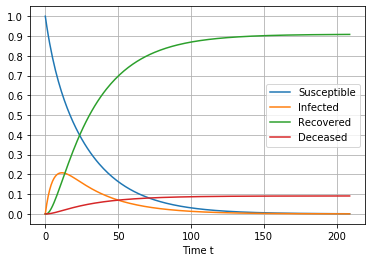

In [78]:
T = 210
A = np.array([[0.95, 0.04, 0, 0],
              [0.05, 0.85, 0, 0],
              [0, 0.1, 1, 0],
              [0, 0.01, 0, 1]])
x_1 = np.array([1, 0, 0, 0])

# state trajectory
state_traj = np.column_stack([x_1, np.zeros((4, T-1))])

# dynamics recursion
for t in range(T-1):
    state_traj[:, t+1] = A @ state_traj[:,t]

plt.ion()
plt.plot(np.arange(T), state_traj.T)
plt.xlabel('Time t')
plt.legend(['Susceptible', 'Infected', 'Recovered', 'Deceased'])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid(b=True, which='both')
plt.show()

# 9.4 Motion of a mass

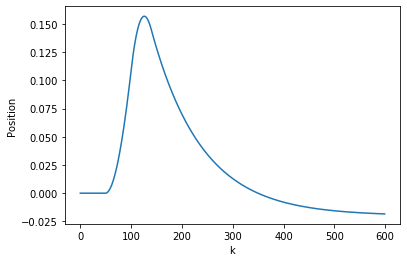

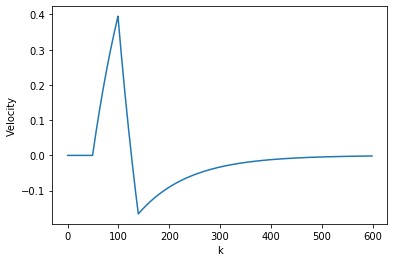

In [89]:
h = 0.01  # time interval (called the 'sampling interval') 
m = 1  # mass
eta = 1  # drag coefficient

A = np.block([[1, h],
              [0, 1-h*eta/m]])
B = np.vstack([0, h/m])
x1 = np.array([0, 0])  # initial condition

K = 600  # simulate for K*h = 6 seconds
f = np.zeros((K))  # force
f[49:99] = 1
f[99:139] = -1.3
X = np.column_stack([x1, np.zeros((2, K-1))])  # state trajectory

for k in range(K-1):
    X[:, k+1] = A @ X[:, k] + f[k]*B.T

plt.ion()
plt.plot(X[0,:])
plt.xlabel('k')
plt.ylabel('Position')
plt.show()

plt.plot(X[1,:])
plt.xlabel('k')
plt.ylabel('Velocity')
plt.show()

# 9.5 Supply chain dynamics